In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('credit_scoring.csv')

In [4]:
df.head(6)

,Age,Gender,Marital Status,Education Level,Employment Sta,Credit Utilization
0,60,Male,Married,Master,Employed,0.22
1,25,Male,Married,High School,Unemployed,0.2
2,30\n58,Female\nFemale,Single\nMarried,Master\nPhD,Employed\nUnemployed,0.22\n0.12
3,32,Male,Married,Bachelor,Self-Employed,0.99
4,42,Male,Divorced,Master,Unemployed,0.94
5,44\n24,Female\nMale,Divorced\nDivorced,Bachelor\nMaster,Unemployed\nEmployed,0.32\n0.66


In [5]:
# In credit scoring data , you have to apply Encoding(All types) , And let suppose you encode all data from label
# encooder then on all numerical data you have to apply log transformation  using function transofrmer .

In [6]:
df['Employment Sta'] = df['Employment Sta'].str.split('\n').str[0]
# split the data

In [7]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[['Unemployed', 'Self-Employed', 'Employed']])
df['Employment Sta'] = oe.fit_transform(df[['Employment Sta']])


In [8]:
df.head(6)

,Age,Gender,Marital Status,Education Level,Employment Sta,Credit Utilization
0,60,Male,Married,Master,2.0,0.22
1,25,Male,Married,High School,0.0,0.2
2,30\n58,Female\nFemale,Single\nMarried,Master\nPhD,2.0,0.22\n0.12
3,32,Male,Married,Bachelor,1.0,0.99
4,42,Male,Divorced,Master,0.0,0.94
5,44\n24,Female\nMale,Divorced\nDivorced,Bachelor\nMaster,0.0,0.32\n0.66


In [9]:
df.head(6)

,Age,Gender,Marital Status,Education Level,Employment Sta,Credit Utilization
0,60,Male,Married,Master,2.0,0.22
1,25,Male,Married,High School,0.0,0.2
2,30\n58,Female\nFemale,Single\nMarried,Master\nPhD,2.0,0.22\n0.12
3,32,Male,Married,Bachelor,1.0,0.99
4,42,Male,Divorced,Master,0.0,0.94
5,44\n24,Female\nMale,Divorced\nDivorced,Bachelor\nMaster,0.0,0.32\n0.66


In [10]:
x = df.drop(columns=['Credit Utilization'])
y = df['Credit Utilization']


In [11]:
df.head(6)

,Age,Gender,Marital Status,Education Level,Employment Sta,Credit Utilization
0,60,Male,Married,Master,2.0,0.22
1,25,Male,Married,High School,0.0,0.2
2,30\n58,Female\nFemale,Single\nMarried,Master\nPhD,2.0,0.22\n0.12
3,32,Male,Married,Bachelor,1.0,0.99
4,42,Male,Divorced,Master,0.0,0.94
5,44\n24,Female\nMale,Divorced\nDivorced,Bachelor\nMaster,0.0,0.32\n0.66


In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df['Gender'] = lb.fit_transform(df['Gender'])
df['Education Level'] = lb.fit_transform(df['Education Level'])
df['Marital Status'] = lb.fit_transform(df['Marital Status'])


In [13]:
num_cols = ['Age', 'Income', 'Loan Amount']
binary_cols = ['Gender', 'Has Loan']
nominal_cols = ['Marital Status', 'Education']
ordinal_cols = ['Credit Grade']

In [14]:
num_cols = x.select_dtypes(include=['int64', 'float64']).columns


In [15]:
from sklearn.preprocessing import FunctionTransformer
log_transform = FunctionTransformer(np.log1p)
x[num_cols] = log_transform.fit_transform(x[num_cols])

In [16]:
df['Age'] = df['Age'].astype(str).str.split('\n').str[0].astype(float)
df['Credit Utilization'] = df['Credit Utilization'].astype(str).str.split('\n').str[0].astype(float)


numeric_cols_to_transform = df.select_dtypes(include=[np.number]).columns

log_transform = FunctionTransformer(np.log1p)
df[numeric_cols_to_transform] = log_transform.fit_transform(df[numeric_cols_to_transform])
df

,Age,Gender,Marital Status,Education Level,Employment Sta,Credit Utilization
0,4.110874,1.386294,1.386294,1.945910,1.098612,0.198851
1,3.258097,1.386294,1.386294,1.609438,0.000000,0.182322
2,3.433987,0.693147,2.197225,2.397895,1.098612,0.198851
3,3.496508,1.386294,1.386294,0.000000,0.693147,0.688135
4,3.761200,1.386294,0.000000,1.945910,0.000000,0.662688
5,3.806662,1.098612,0.693147,1.098612,0.000000,0.277632
6,4.007333,0.000000,0.000000,2.484907,0.000000,0.336472
7,4.110874,1.386294,0.000000,2.484907,0.000000,0.058269
8,3.332205,1.098612,0.693147,2.302585,1.098612,0.254642
9,4.077537,0.000000,1.945910,1.609438,1.098612,0.657520


In [17]:
df.head(6)

,Age,Gender,Marital Status,Education Level,Employment Sta,Credit Utilization
0,4.110874,1.386294,1.386294,1.945910,1.098612,0.198851
1,3.258097,1.386294,1.386294,1.609438,0.000000,0.182322
2,3.433987,0.693147,2.197225,2.397895,1.098612,0.198851
3,3.496508,1.386294,1.386294,0.000000,0.693147,0.688135
4,3.761200,1.386294,0.000000,1.945910,0.000000,0.662688
5,3.806662,1.098612,0.693147,1.098612,0.000000,0.277632


In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('/content/credit_scoring.csv')

In [20]:
# In cars data , You have to apply  Standardscaler , And check outliers and if there are outliers then handle it .


In [21]:
df.head(6)

,Age,Gender,Marital Status,Education Level,Employment Sta,Credit Utilization
0,60,Male,Married,Master,Employed,0.22
1,25,Male,Married,High School,Unemployed,0.2
2,30\n58,Female\nFemale,Single\nMarried,Master\nPhD,Employed\nUnemployed,0.22\n0.12
3,32,Male,Married,Bachelor,Self-Employed,0.99
4,42,Male,Divorced,Master,Unemployed,0.94
5,44\n24,Female\nMale,Divorced\nDivorced,Bachelor\nMaster,Unemployed\nEmployed,0.32\n0.66


In [22]:
numeric_column = ['Credit Utilization','Age']
categorical_column = ['Gender','Education Level','Marital Status']


In [23]:
df['Credit Utilization'] = pd.to_numeric(df['Credit Utilization'], errors='coerce')


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Credit Utilization'>

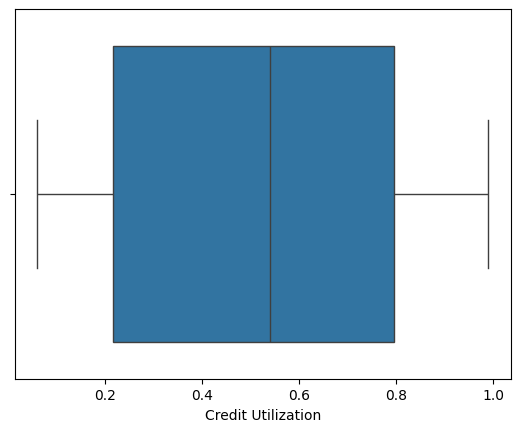

In [25]:
df['Credit Utilization'] = pd.to_numeric(df['Credit Utilization'], errors='coerce')
sns.boxplot(x=df['Credit Utilization'])

<Axes: xlabel='Credit Utilization'>

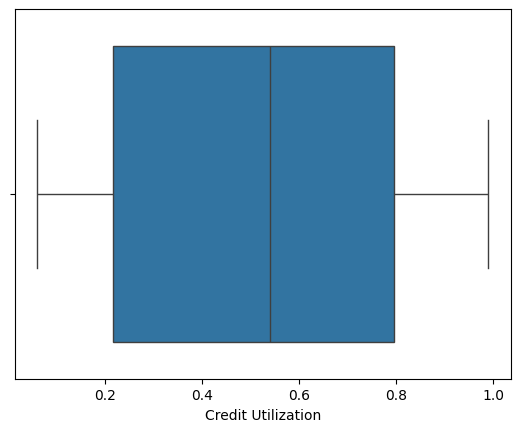

In [26]:
sns.boxplot(x = df['Credit Utilization'])

In [27]:
percentile25 = df['Credit Utilization'].quantile(0.25)
percentile75 = df['Credit Utilization'].quantile(0.75)

In [28]:
percentile25

np.float64(0.215)

In [29]:
percentile75

np.float64(0.7949999999999999)

In [30]:
IQR = percentile75 - percentile25
IQR

np.float64(0.58)

In [31]:
upper_fence = percentile75 + 1.5 * (IQR)
lower_fence = percentile25 - 1.5 * (IQR)
print("Upper Limit: ", upper_fence)
print("Lower Limit: ", lower_fence)

Upper Limit:  1.6649999999999998
Lower Limit:  -0.6549999999999999


In [32]:
df[df['Credit Utilization'] > upper_fence]
df[df['Credit Utilization'] < lower_fence]

,Age,Gender,Marital Status,Education Level,Employment Sta,Credit Utilization


In [33]:
new_df = df[df['Credit Utilization'] < upper_fence]
new_df

,Age,Gender,Marital Status,Education Level,Employment Sta,Credit Utilization
0,60,Male,Married,Master,Employed,0.22
1,25,Male,Married,High School,Unemployed,0.20
3,32,Male,Married,Bachelor,Self-Employed,0.99
4,42,Male,Divorced,Master,Unemployed,0.94
6,54,Female,Divorced,PhD,Unemployed,0.40
7,60,Male,Divorced,PhD,Unemployed,0.06
9,58,Female,Single,High School,Employed,0.93
10,51,Male,Divorced,Bachelor,Employed,0.66
12,22,Female,Married,Bachelor,Self-Employed,0.67
13,35,Female,Single,Bachelor,Employed,0.10


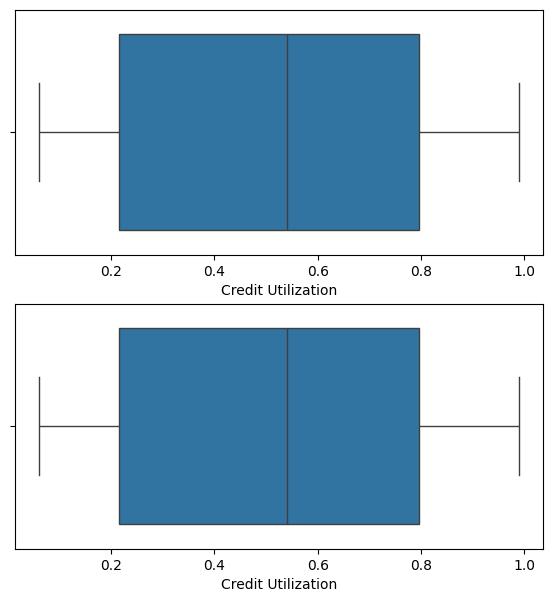

In [34]:
## Comparison
plt.figure(figsize= (15,7))

plt.subplot(222) # 2 X 2 X 2 Grid
sns.boxplot(x = df['Credit Utilization'])

plt.subplot(224) #Again uses a 2 × 2 grid., 224 means 4th position (bottom-right).
sns.boxplot(x = new_df['Credit Utilization'])

plt.show()

In [35]:
new_df_cap = df.copy()

In [36]:
import numpy as np

new_df_cap['Credit Utilization'] = np.where(
    new_df_cap['Credit Utilization'] > upper_fence, #np.where(condition, value_if_true, value_if_false)
    upper_fence,
    np.where(
        new_df_cap['Credit Utilization'] < lower_fence,
        lower_fence,
        new_df_cap['Credit Utilization']
    )
)

In [37]:
df.head(4)

,Age,Gender,Marital Status,Education Level,Employment Sta,Credit Utilization
0,60,Male,Married,Master,Employed,0.22
1,25,Male,Married,High School,Unemployed,0.20
2,30\n58,Female\nFemale,Single\nMarried,Master\nPhD,Employed\nUnemployed,NaN
3,32,Male,Married,Bachelor,Self-Employed,0.99


In [38]:
new_df_cap['Credit Utilization'] = new_df_cap['Credit Utilization'].clip(lower_fence, upper_fence)

In [39]:
new_df_cap

,Age,Gender,Marital Status,Education Level,Employment Sta,Credit Utilization
0,60,Male,Married,Master,Employed,0.22
1,25,Male,Married,High School,Unemployed,0.20
2,30\n58,Female\nFemale,Single\nMarried,Master\nPhD,Employed\nUnemployed,NaN
3,32,Male,Married,Bachelor,Self-Employed,0.99
4,42,Male,Divorced,Master,Unemployed,0.94
5,44\n24,Female\nMale,Divorced\nDivorced,Bachelor\nMaster,Unemployed\nEmployed,NaN
6,54,Female,Divorced,PhD,Unemployed,0.40
7,60,Male,Divorced,PhD,Unemployed,0.06
8,27\n52,Female\nMale,Divorced\nDivorced,Master\nMaster,Employed\nUnemployed,NaN
9,58,Female,Single,High School,Employed,0.93


In [40]:
import pandas as pd

In [41]:
df = pd.read_csv('/content/cars - cars.csv')

In [42]:
df.head(6)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC BSII,1992,50000,100000,Petrol,Individual,Manual,Fourth & Above Owner
1,Maruti Gypsy E MG410W ST,1995,95000,100000,Petrol,Individual,Manual,Second Owner
2,Mahindra Jeep CL 500 MDI,1996,250000,35000,Diesel,Individual,Manual,Second Owner
3,Mahindra Jeep MM 540,1996,200000,60000,Diesel,Individual,Manual,First Owner
4,Mahindra Jeep CL 500 MDI,1997,150000,120000,Diesel,Individual,Manual,Third Owner
5,Maruti Esteem AX,1997,79000,70000,Petrol,Individual,Automatic,First Owner


In [43]:
from sklearn.preprocessing import StandardScaler
num_cols = ['selling_price','km_driven']

num_cols = df.select_dtypes(include=['int64', 'float64']).columns


scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [44]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

<Axes: xlabel='km_driven'>

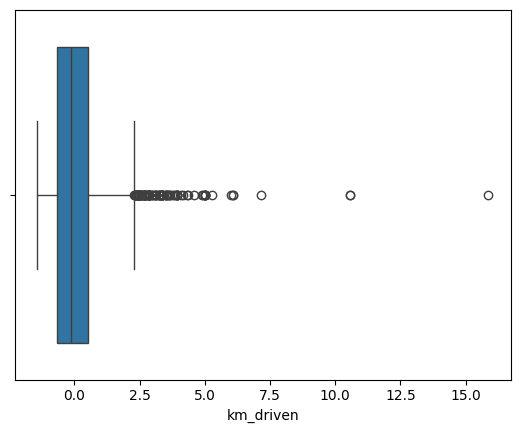

In [45]:
import seaborn as sns
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')
sns.boxplot(x=df['km_driven'])

<Axes: xlabel='km_driven'>

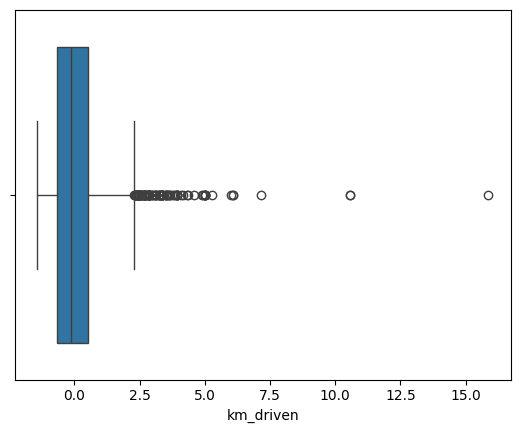

In [46]:
sns.boxplot(x = df['km_driven'])

In [47]:

percentile25 = df['km_driven'].quantile(0.25)
percentile75 = df['km_driven'].quantile(0.75)

In [48]:
percentile25

np.float64(-0.6693102205951178)

In [49]:
percentile75

np.float64(0.509967221007434)

In [50]:
IQR = percentile75 - percentile25
IQR

np.float64(1.1792774416025518)

In [51]:
upper_fence = percentile75 + 1.5 * (IQR)
lower_fence = percentile25 - 1.5 * (IQR)
print("Upper Limit: ", upper_fence)
print("Lower Limit: ", lower_fence)

Upper Limit:  2.2788833834112614
Lower Limit:  -2.4382263829989457


In [52]:
df[df['km_driven'] > upper_fence]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
60,Toyota Qualis FS B3,-2.868610,-0.612166,4.069241,Diesel,Dealer,Manual,First Owner
113,Honda City 1.5 EXI,-2.156842,-0.560307,2.868522,Petrol,Individual,Manual,Second Owner
117,Mahindra Scorpio VLX AT 2WD BSIII,-2.156842,-0.482517,3.375826,Diesel,Individual,Automatic,Third Owner
165,Toyota Innova 2.5 V Diesel 7-seater,-1.919586,-0.525733,3.361674,Diesel,Individual,Manual,First Owner
196,Mahindra Scorpio 2.6 CRDe,-1.919586,-0.568950,3.940593,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
2856,Mahindra Bolero Power Plus Plus AC BSIV PS,0.452973,-0.128141,2.868522,Diesel,Individual,Manual,First Owner
2906,Ford EcoSport 1.5 TDCi Titanium BSIV,0.452973,0.044725,2.332487,Diesel,Individual,Manual,Third Owner
2937,Maruti SX4 S Cross DDiS 320 Delta,0.690229,0.278095,10.587429,Diesel,Dealer,Manual,First Owner
3201,Hyundai Xcent 1.1 CRDi S,0.690229,-0.404727,2.332487,Diesel,Individual,Manual,First Owner


In [53]:
df[df['km_driven'] < lower_fence]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner


In [54]:
new_df = df[df['km_driven'] < upper_fence]
new_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC BSII,-5.003913,-0.785033,0.724381,Petrol,Individual,Manual,Fourth & Above Owner
1,Maruti Gypsy E MG410W ST,-4.292145,-0.707243,0.724381,Petrol,Individual,Manual,Second Owner
2,Mahindra Jeep CL 500 MDI,-4.054889,-0.439300,-0.669310,Diesel,Individual,Manual,Second Owner
3,Mahindra Jeep MM 540,-4.054889,-0.525733,-0.133275,Diesel,Individual,Manual,First Owner
4,Mahindra Jeep CL 500 MDI,-3.817633,-0.612166,1.153209,Diesel,Individual,Manual,Third Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai Venue SX Opt Turbo BSIV,1.639252,0.943629,-1.396174,Petrol,Individual,Manual,First Owner
4336,Hyundai Grand i10 1.2 Kappa Magna BSIV,1.639252,0.070655,-1.312552,Petrol,Individual,Manual,First Owner
4337,Ford Figo Aspire 1.5 TDCi Titanium,1.639252,0.044725,-0.454896,Diesel,Dealer,Manual,First Owner
4338,Tata Harrier XE,1.639252,-0.135056,-1.398318,Diesel,Individual,Manual,First Owner


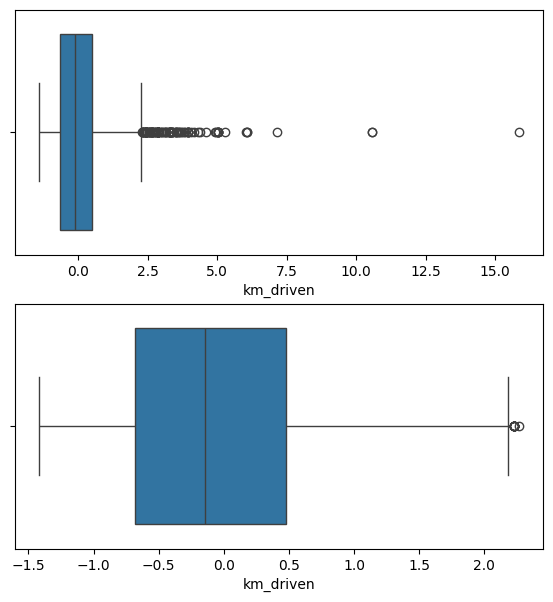

In [55]:
import matplotlib.pyplot as plt
## Comparison
plt.figure(figsize= (15,7))

plt.subplot(222) # 2 X 2 X 2 Grid
sns.boxplot(x = df['km_driven'])

plt.subplot(224) #Again uses a 2 × 2 grid., 224 means 4th position (bottom-right).
sns.boxplot(x = new_df['km_driven'])

plt.show()

In [56]:
## Capping (Outlier Removing Technique)
new_df_cap = df.copy()

In [57]:
import numpy as np

new_df_cap['km_driven'] = np.where(
    new_df_cap['km_driven'] > upper_fence, #np.where(condition, value_if_true, value_if_false)
    upper_fence,
    np.where(
        new_df_cap['km_driven'] < lower_fence,
        lower_fence,
        new_df_cap['km_driven']
    )
)


In [58]:
new_df_cap['km_driven'] = new_df_cap['km_driven'].clip(lower_fence, upper_fence)

In [61]:
new_df_cap

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC BSII,-5.003913,-0.785033,0.724381,Petrol,Individual,Manual,Fourth & Above Owner
1,Maruti Gypsy E MG410W ST,-4.292145,-0.707243,0.724381,Petrol,Individual,Manual,Second Owner
2,Mahindra Jeep CL 500 MDI,-4.054889,-0.439300,-0.669310,Diesel,Individual,Manual,Second Owner
3,Mahindra Jeep MM 540,-4.054889,-0.525733,-0.133275,Diesel,Individual,Manual,First Owner
4,Mahindra Jeep CL 500 MDI,-3.817633,-0.612166,1.153209,Diesel,Individual,Manual,Third Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai Venue SX Opt Turbo BSIV,1.639252,0.943629,-1.396174,Petrol,Individual,Manual,First Owner
4336,Hyundai Grand i10 1.2 Kappa Magna BSIV,1.639252,0.070655,-1.312552,Petrol,Individual,Manual,First Owner
4337,Ford Figo Aspire 1.5 TDCi Titanium,1.639252,0.044725,-0.454896,Diesel,Dealer,Manual,First Owner
4338,Tata Harrier XE,1.639252,-0.135056,-1.398318,Diesel,Individual,Manual,First Owner
